In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

## Question 4

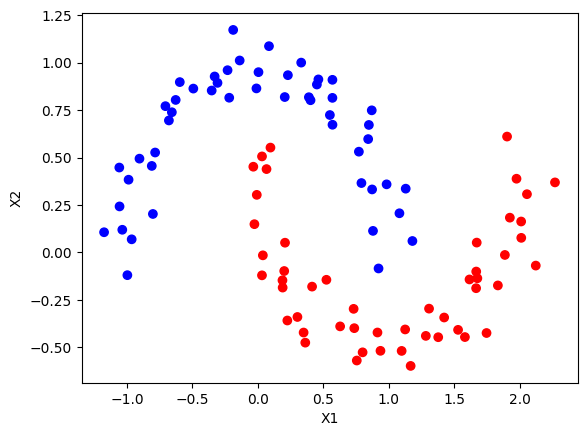

In [2]:
# Generate the dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=5)

<Axes: >

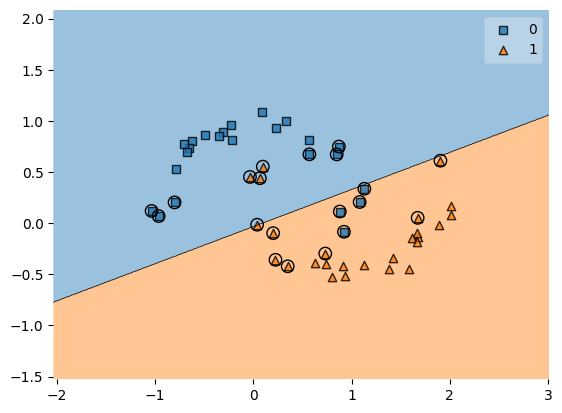

In [4]:
# Fit a support vector classifier (kernel=linear)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=svc, X_highlight=svc.support_vectors_)

In [5]:
# Support vector classifier model summary
print('number of support vectors: ', sum(svc.n_support_))
print('indices of support vectors: ', svc.support_)

number of support vectors:  20
indices of support vectors:  [14 15 16 18 26 27 37 41 44 45  3 12 17 23 31 35 40 43 47 49]


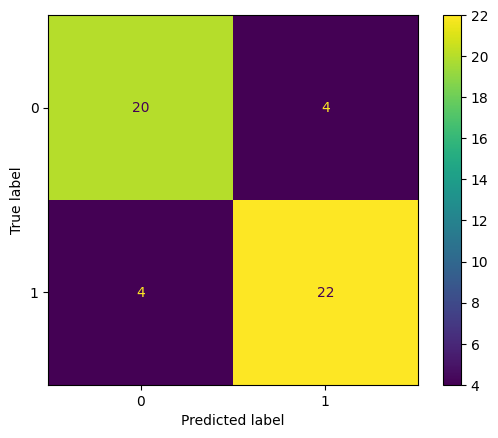

In [6]:
# training set performance
y_pred = svc.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

The support vector classifier has misclassified approximately 13% of the training set.

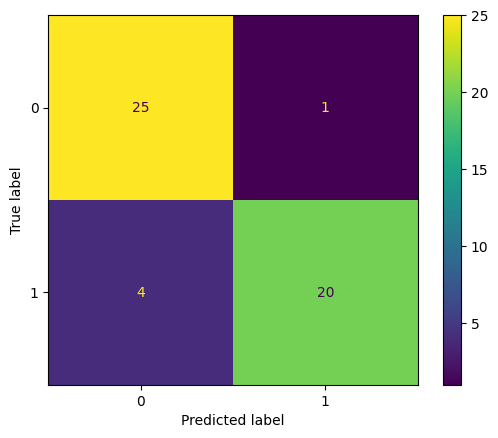

In [7]:
# Test set performance
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

The support vector classifier has misclassified approximately 17% of the test set.

In [8]:
# Support Vector Machine with Polynomial Kernel

params = {'C': 10**np.linspace(-1, 3, 5),
          'degree' : [2, 3, 4, 5, 6]}

svm = SVC(kernel='poly')
tune = GridSearchCV(svm, params, cv=10)
tune.fit(X, y)

pd.DataFrame(tune.cv_results_).loc[:, ['param_degree', 'param_C', 'mean_test_score', 'std_test_score']]

,param_degree,param_C,mean_test_score,std_test_score
0,2,0.1,0.69,0.130000
1,3,0.1,0.77,0.118743
2,4,0.1,0.70,0.109545
3,5,0.1,0.75,0.111803
4,6,0.1,0.73,0.090000
5,2,1.0,0.79,0.094340
6,3,1.0,0.89,0.094340
7,4,1.0,0.65,0.067082
8,5,1.0,0.87,0.100499
9,6,1.0,0.72,0.132665


In [9]:
tune.best_params_

{'C': 10.0, 'degree': 3}

<Axes: >

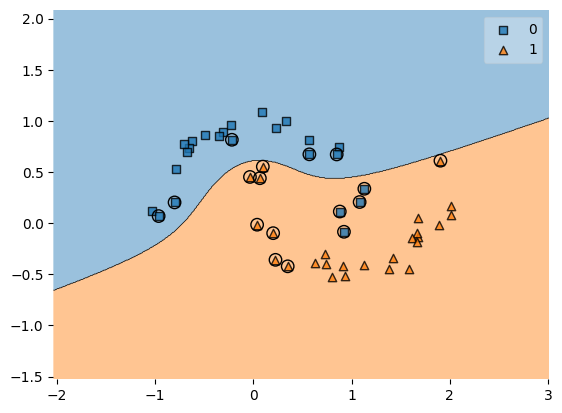

In [10]:
svm = SVC(kernel='poly', C=10, degree=3)
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_)

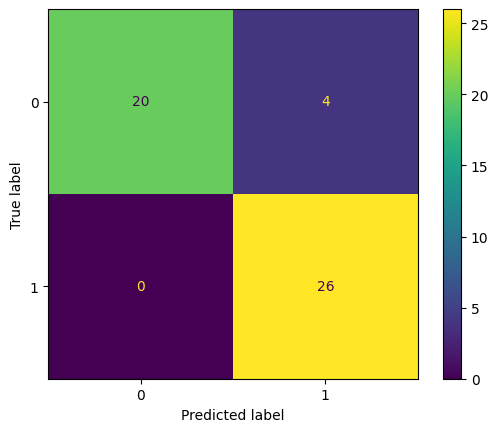

In [11]:
# SVM - training set performance (with degree=3)
y_pred = svm.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

The SVM model with degree 3 has misclassified only 5% of the training set.

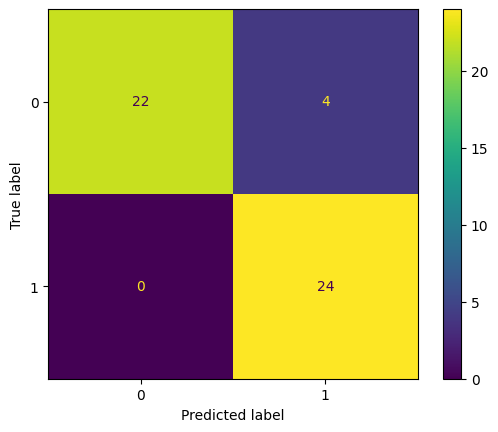

In [12]:
# SVM - test set performance (with degree=3)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

The SVM model with a degree of 3 has misclassified only 13% of the test set. Based on these results, we can conclude that the SVM with a non-linear kernel (polynomial - cubic) performs better than the SVM with a linear kernel on both the training and test sets.

In [13]:
# Support Vector Machine with Radial Kernel

params = {'C': 10**np.linspace(-1, 3, 5),
         'gamma': [0.5, 1, 2, 3, 4]}
svm2 = SVC(kernel='rbf')
tune2 = GridSearchCV(svm2, params, cv=10)
tune2.fit(X, y)

pd.DataFrame(tune2.cv_results_).loc[:, ['param_gamma', 'mean_test_score', 'std_test_score']]

,param_gamma,mean_test_score,std_test_score
0,0.5,0.87,0.090000
1,1,0.90,0.089443
2,2,0.93,0.078102
3,3,0.94,0.080000
4,4,0.96,0.066332
5,0.5,0.93,0.078102
6,1,0.97,0.064031
7,2,0.99,0.030000
8,3,0.99,0.030000
9,4,1.00,0.000000


In [14]:
tune2.best_params_

{'C': 1.0, 'gamma': 4}

<Axes: >

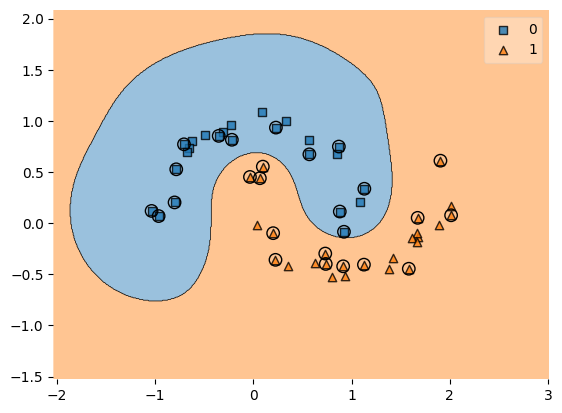

In [15]:
svm2 = SVC(kernel='rbf', C=1, gamma=4)
svm2.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_)

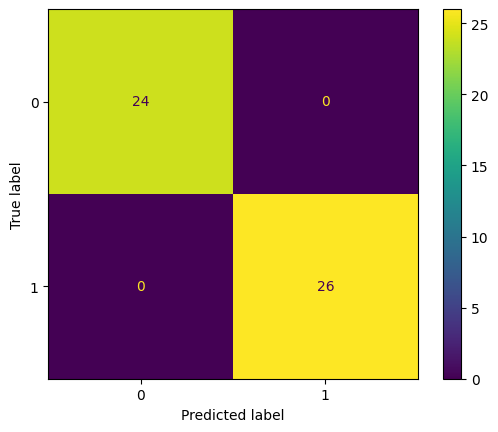

In [16]:
# SVM - training set performance (with radial kernel)
y_pred = svm2.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=svm2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot()

The SVM with a radial kernel has achieved perfect classification on the training set, with no misclassified observations.

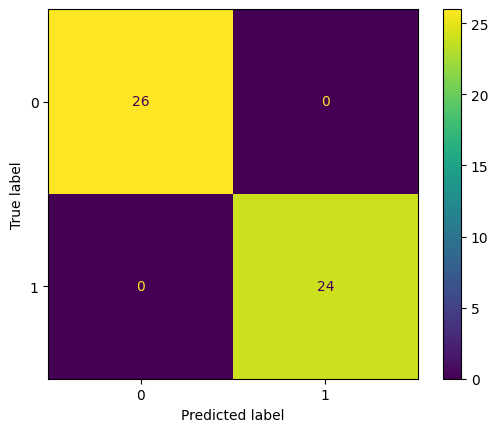

In [17]:
# SVM - test set performance (with radial kernel)
y_pred = svm2.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=svm2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot()

The SVM with a radial kernel has also achieved perfect classification on the test set, with no misclassified observations.

Based on the obtained results, it can be concluded that both the SVM with a cubic polynomial kernel and the SVM with a radial kernel outperform the SVC model with a linear kernel on this data. However, it is important to note that the SVM with a radial kernel may be prone to overfitting the data.

## Question 5

### 5.a & 5.b

In [18]:
x1 = np.random.rand(500) - 0.5
x2 = np.random.rand(500) - 0.5
y = 1 * (x1**2 - x2**2 > 0)

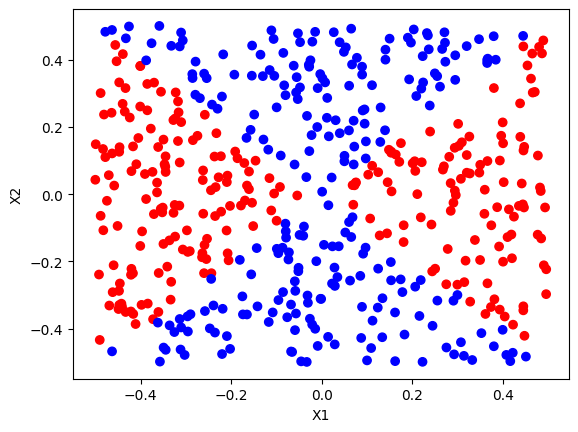

In [19]:
# Plot the dataset
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.c

In [20]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = df.drop(['y'], axis=1)
y = df.y

logit = LogisticRegression(fit_intercept=True)
logit.fit(X, y)

LogisticRegression()

### 5.d

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=11)

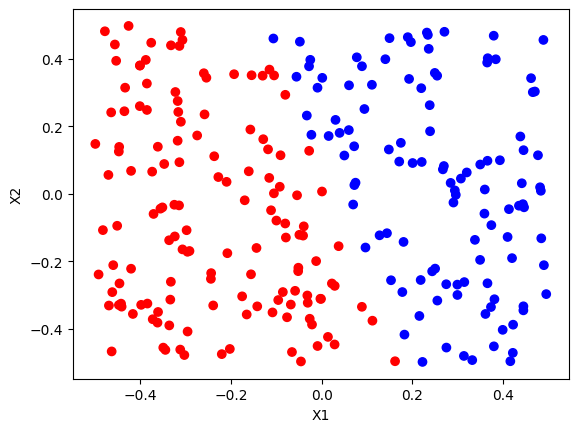

In [22]:
y_pred = logit.predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_pred, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.e

In [23]:
df['X1^2'] = np.power(X.iloc[:, 0], 2)
df['X2^2'] = np.power(X.iloc[:, 1], 2)
df['X1X2'] = np.multiply(X.iloc[:, 0], X.iloc[:, 1])

X2 = df.drop(['y'], axis=1)
y2 = df.y

In [24]:
logit2 = LogisticRegression(fit_intercept=True)
logit2.fit(X2, y2)

LogisticRegression()

### 5.f

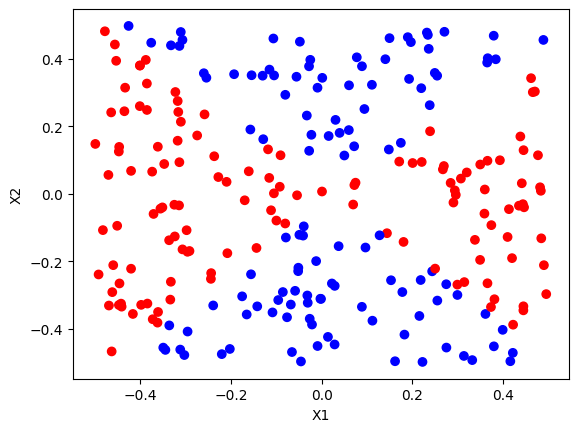

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.5, random_state=11)

y_pred = logit2.predict(X_train2)

plt.scatter(X_train2.iloc[:, 0], X_train2.iloc[:, 1], c=y_pred, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.g

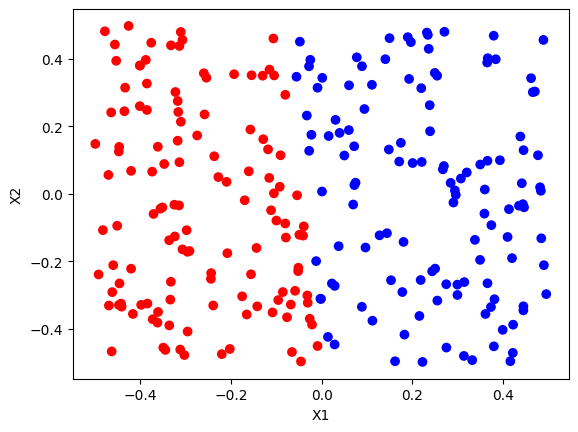

In [26]:
# fit a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X, y)

y_pred = svc.predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_pred, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.h

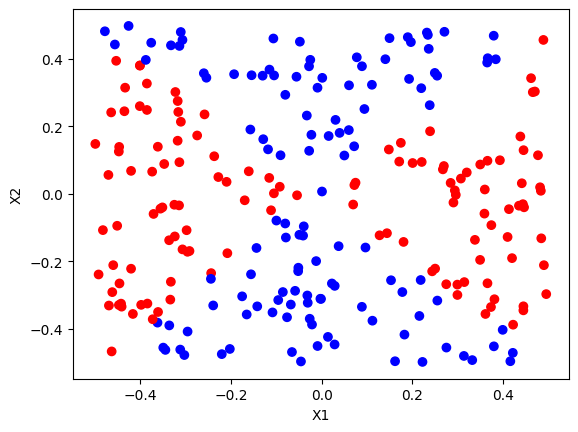

In [27]:
# fit a support vector machine with non-linear kernel
svc = SVC(kernel='rbf')
svc.fit(X, y)

y_pred = svc.predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_pred, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Question 6
Investigating the impact of value of the `cost` parameter.
### 6.a

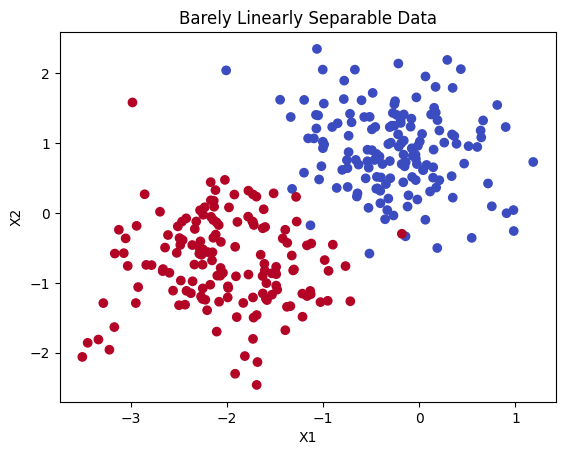

In [28]:
# Generate two-class data
X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=0.6, center_box=(-2, 2), random_state=1)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Barely Linearly Separable Data')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

### 6.b

In [30]:
params = {'C': 10**np.linspace(-2, 3, 6)}

svc = SVC(kernel='linear')
tune = GridSearchCV(svc, params, cv=10)
tune.fit(X_train, y_train)

pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.01,0.990476,0.019048
1,0.1,0.980952,0.023328
2,1.0,0.980952,0.023328
3,10.0,0.980952,0.023328
4,100.0,0.980952,0.023328
5,1000.0,0.980952,0.023328


In [31]:
tune.best_params_

{'C': 0.01}

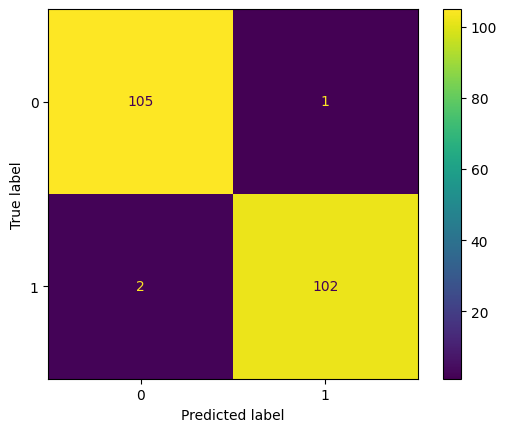

In [32]:
svc = SVC(kernel='linear', C=tune.best_params_['C'])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

Only 2% of the training observations are misclassified.

<Axes: >

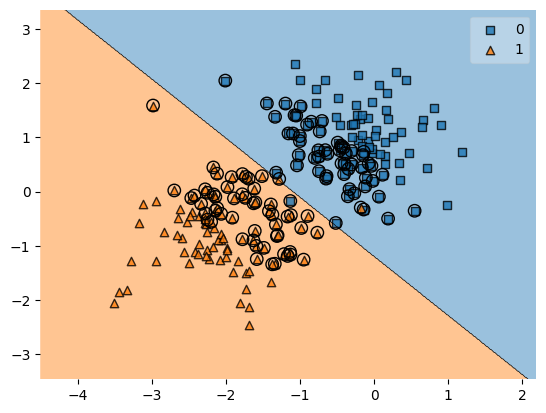

In [33]:
plot_decision_regions(X_train, y_train, clf=svc, X_highlight=svc.support_vectors_)

### 6.c

In [34]:
params = {'C': 10**np.linspace(-2, 3, 6)}

svc = SVC(kernel='linear')
tune2 = GridSearchCV(svc, params, cv=10)
tune2.fit(X_test, y_test)

pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.01,0.990476,0.019048
1,0.1,0.980952,0.023328
2,1.0,0.980952,0.023328
3,10.0,0.980952,0.023328
4,100.0,0.980952,0.023328
5,1000.0,0.980952,0.023328


In [35]:
tune2.best_params_

{'C': 0.01}

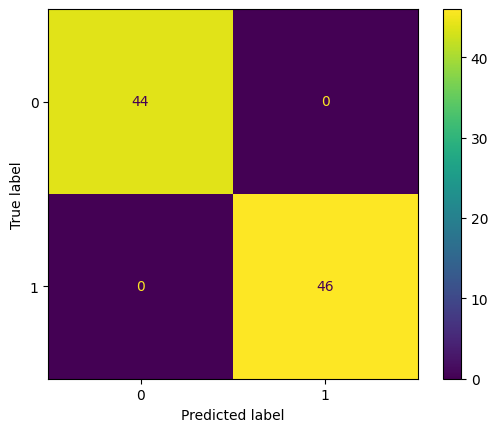

In [36]:
svc2 = SVC(kernel='linear', C=tune2.best_params_['C'])
svc2.fit(X_test, y_test)

y_pred = svc2.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=svc2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc2.classes_)
disp.plot()

<Axes: >

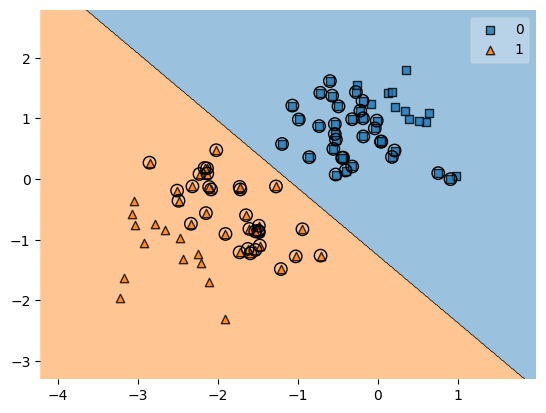

In [37]:
plot_decision_regions(X_test, y_test, clf=svc2, X_highlight=svc2.support_vectors_)

None of the test errors are misclassified by the SVC model with best cost parameter.

## Question 7

### 7.a

In [38]:
auto = pd.read_csv('../../data/auto.csv')
auto.dropna(subset=['horsepower'], inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['var'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,var
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [39]:
X = auto.drop(['var', 'mpg', 'name',], axis=1)
y = auto.loc[:, 'var']

### 7.b

In [40]:
params = {'C': 10**np.linspace(-2, 3, 6)}

svc = SVC(kernel='linear')
tune = GridSearchCV(svc, params, cv=10)
tune.fit(X, y)

pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.01,0.903205,0.035367
1,0.1,0.900769,0.046985
2,1.0,0.890577,0.055286
3,10.0,0.893141,0.050064
4,100.0,0.893077,0.047665
5,1000.0,0.893141,0.050064


In [41]:
tune.best_params_

{'C': 0.01}

### 7.c

In [42]:
# SVM with radial kernel 

params = {'C': 10**np.linspace(-2, 3, 6),
         'gamma': [0.5, 1, 2, 3, 4]}

svm = SVC(kernel='rbf')
tune2 = GridSearchCV(svm, params, cv=10)
tune2.fit(X, y)

pd.DataFrame(tune2.cv_results_).loc[:, ['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]

,param_C,param_gamma,mean_test_score,std_test_score
0,0.01,0.5,0.489744,0.005128
1,0.01,1,0.489744,0.005128
2,0.01,2,0.489744,0.005128
3,0.01,3,0.489744,0.005128
4,0.01,4,0.489744,0.005128
5,0.1,0.5,0.489744,0.005128
6,0.1,1,0.489744,0.005128
7,0.1,2,0.489744,0.005128
8,0.1,3,0.489744,0.005128
9,0.1,4,0.489744,0.005128


In [43]:
tune2.best_params_

{'C': 1.0, 'gamma': 0.5}

In [44]:
# SVM with polynomial kernel 

params = {'C': 10**np.linspace(-2, 3, 6),
         'degree': [1, 2, 3, 4, 5, 6]}

svm = SVC(kernel='poly')
tune3 = GridSearchCV(svm, params, cv=10)
tune3.fit(X, y)

pd.DataFrame(tune3.cv_results_).loc[:, ['param_C', 'param_degree', 
                                        'mean_test_score', 'std_test_score']]

,param_C,param_degree,mean_test_score,std_test_score
0,0.01,1,0.554744,0.136966
1,0.01,2,0.800962,0.062421
2,0.01,3,0.828910,0.058899
3,0.01,4,0.841731,0.058465
4,0.01,5,0.849423,0.053248
5,0.01,6,0.857051,0.056599
6,0.1,1,0.872372,0.046026
7,0.1,2,0.882564,0.043405
8,0.1,3,0.880064,0.043048
9,0.1,4,0.874936,0.045201


In [45]:
tune3.best_params_

{'C': 1000.0, 'degree': 3}

## Question 8

### 8.a

In [2]:
dataset = pd.read_csv('../../data/oj.csv')
store7 = pd.get_dummies(dataset['Store7'])['Yes']
dataset['Store7'] = store7
dataset.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [3]:
X = dataset.drop(['Purchase'], axis=1)
y = dataset.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=0)

### 8.b

In [4]:
svc = SVC(kernel='linear', C=0.01)
svc.fit(X_train, y_train)
print('number of support vectors: ', sum(svc.n_support_))
print('classes: ', svc.classes_)

number of support vectors:  602
classes:  ['CH' 'MM']


### 8.c

In [5]:
print('Training error rate: ', 1-svc.score(X_train, y_train))
print('Test error rate: ', 1-svc.score(X_test, y_test))

Training error rate:  0.28374999999999995
Test error rate:  0.3222222222222222


### 8.d

In [ ]:
params = {'C': 10**np.linspace(-2, 1, 4)}
svc = SVC(kernel='linear')
tune = GridSearchCV(svc, params, cv=10)
tune.fit(X_train, y_train)

tune.best_params_

In [ ]:
svc = SVC(kernel='linear', C=tune.best_params_['C'])
svc.fit(X_train, y_train)

print('Training error rate: ', 1-svc.score(X_train, y_train))
print('Test error rate: ', 1-svc.score(X_test, y_test))

### 8.f

In [9]:
params = {'C': 10**np.linspace(-2, 1, 4)}
svc = SVC(kernel='rbf')
tune2 = GridSearchCV(svc, params, cv=10)
tune2.fit(X_train, y_train)

tune2.best_params_

{'C': 0.01}

In [10]:
svc2 = SVC(kernel='linear', C=tune2.best_params_['C'])
svc2.fit(X_train, y_train)

print('Training error rate: ', 1-svc2.score(X_train, y_train))
print('Test error rate: ', 1-svc2.score(X_test, y_test))

Training error rate:  0.28374999999999995
Test error rate:  0.3222222222222222


### 8.g

In [11]:
params = {'C': 10**np.linspace(-2, 1, 4)}
svc = SVC(kernel='poly', degree=2)
tune3 = GridSearchCV(svc, params, cv=10)
tune3.fit(X_train, y_train)

tune3.best_params_

{'C': 0.01}

In [12]:
svc3 = SVC(kernel='linear', C=tune3.best_params_['C'])
svc3.fit(X_train, y_train)

print('Training error rate: ', 1-svc3.score(X_train, y_train))
print('Test error rate: ', 1-svc3.score(X_test, y_test))

Training error rate:  0.28374999999999995
Test error rate:  0.3222222222222222
